In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


!pip install statsmodels
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df=pd.read_csv('Jamboree_Admission.csv')
df.head()

C:\Users\junai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df.shape

(500, 9)

In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## EDA 

In [5]:
# First step is to remove the serial number as it is not required for prediction
df.drop(columns=['Serial No.'],inplace= True)

C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

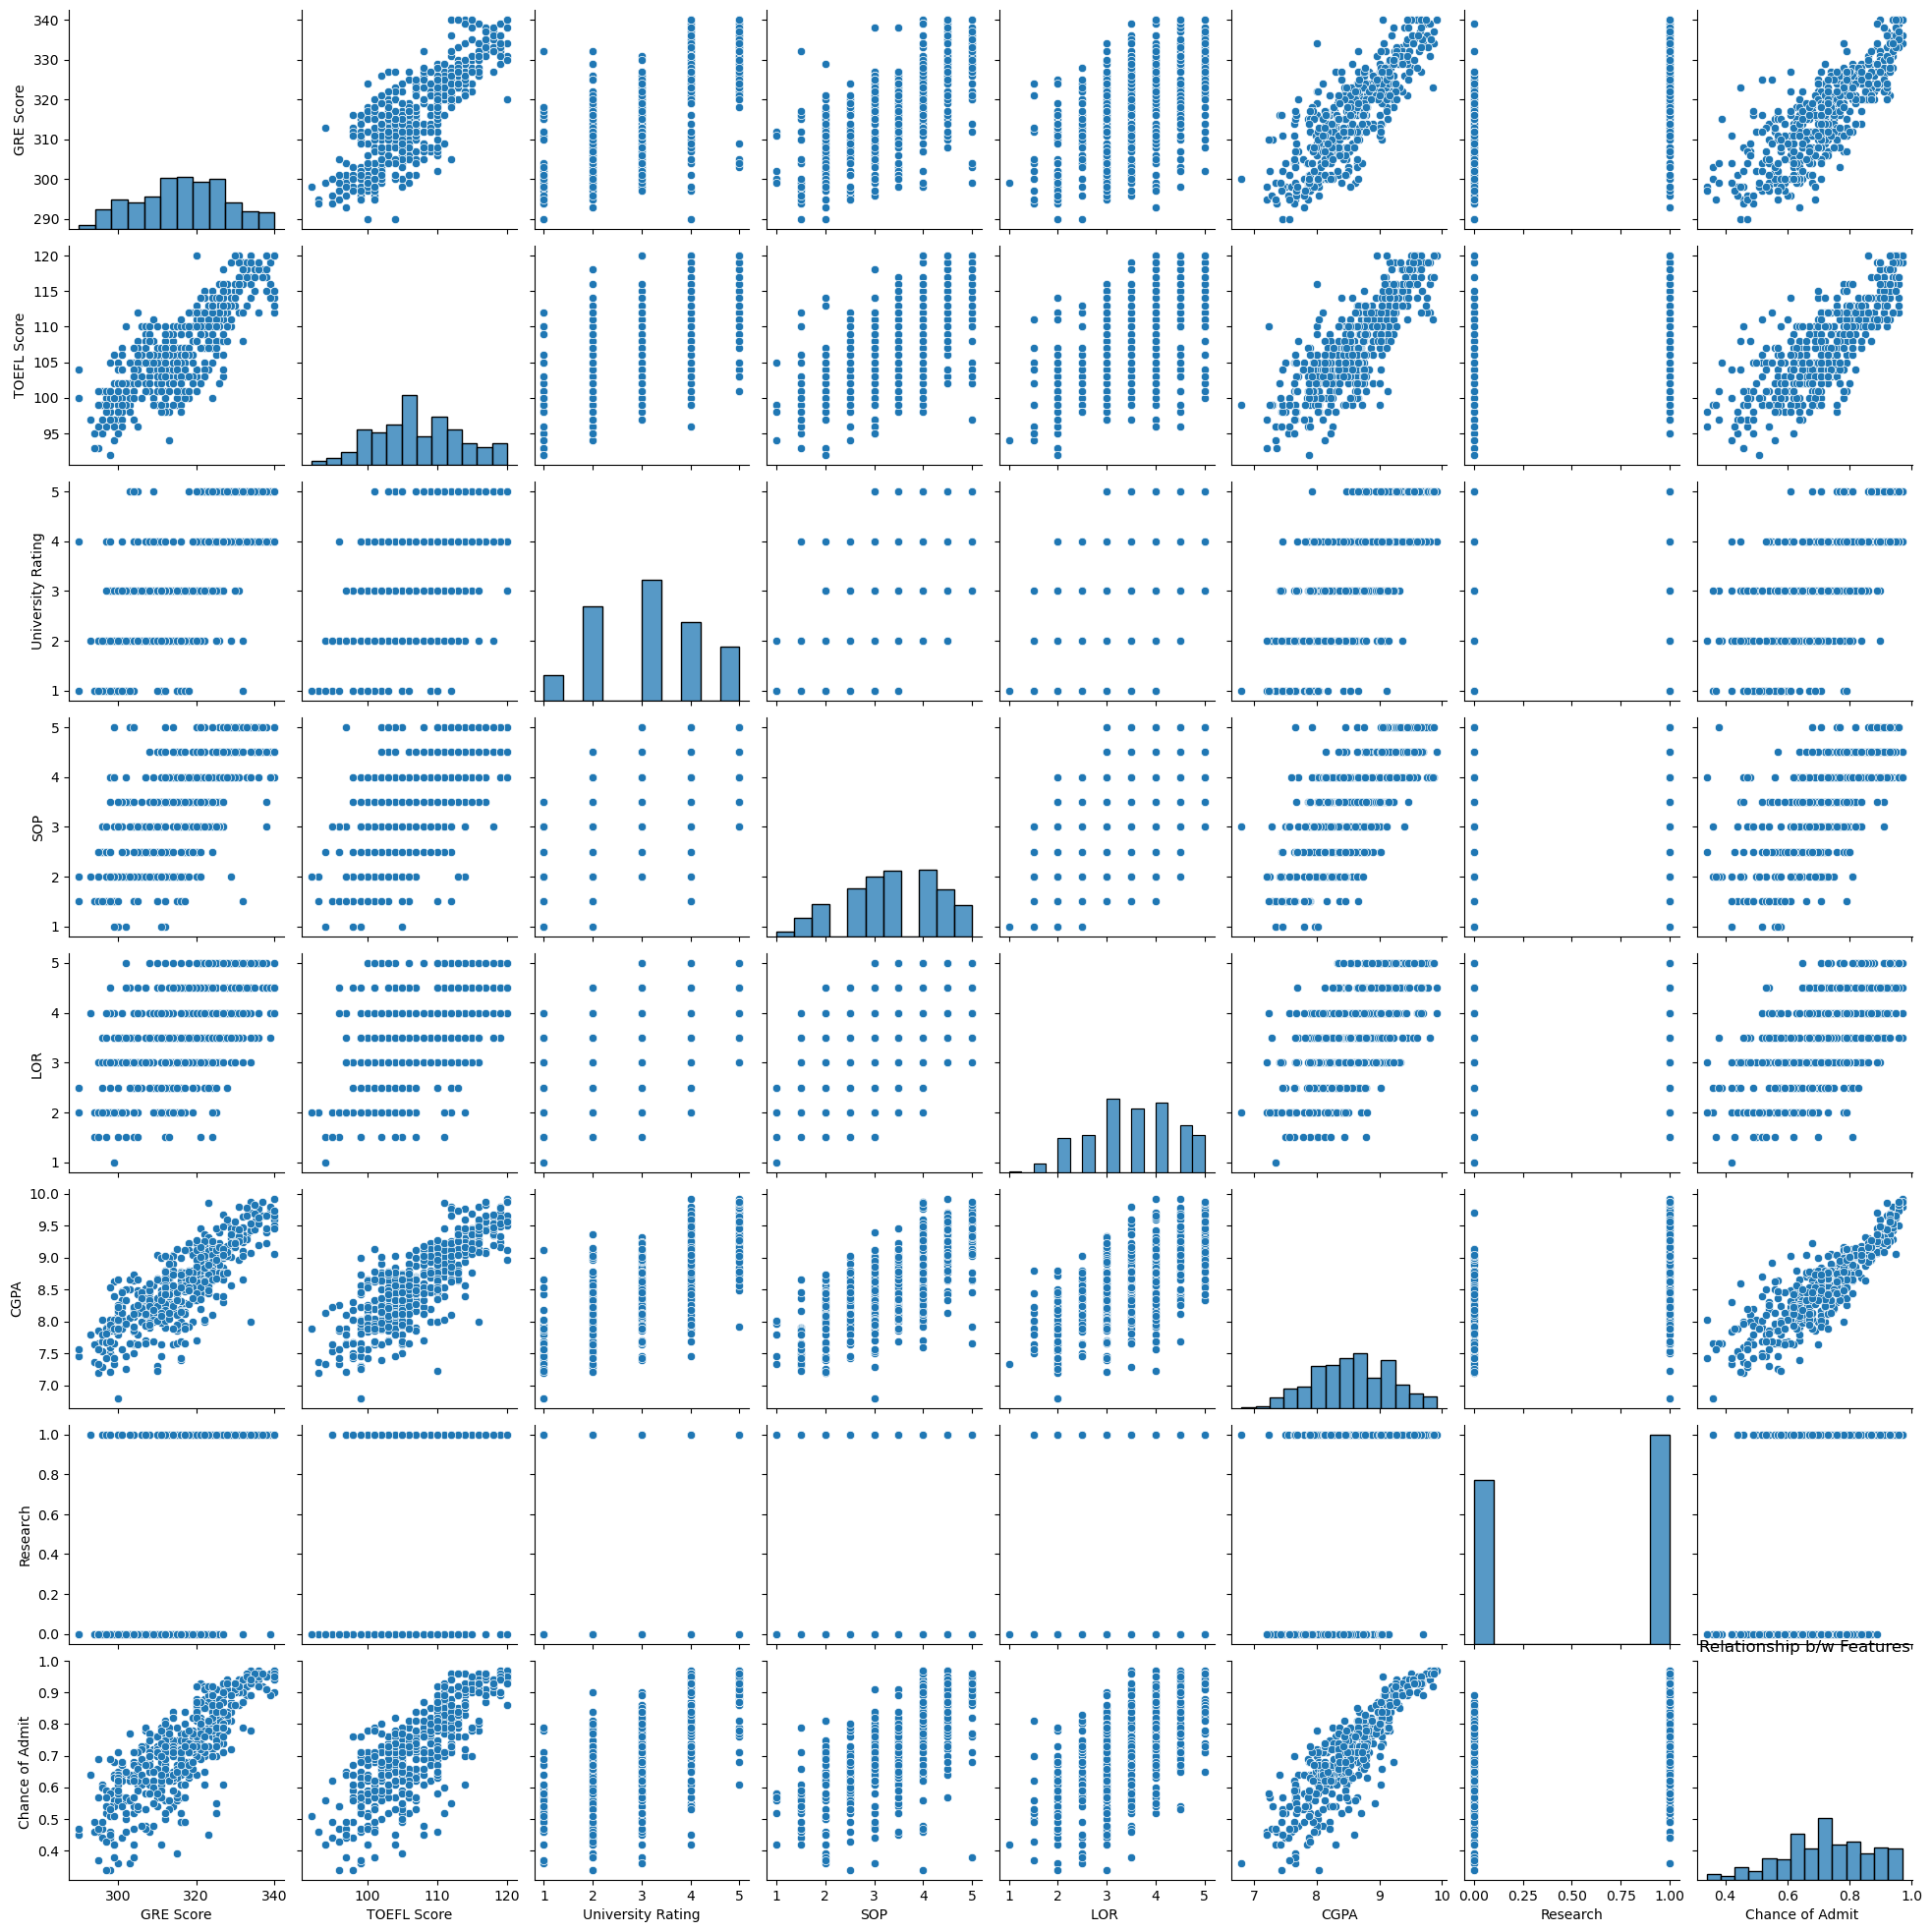

In [6]:
sns.pairplot(df)
plt.title('Relationship b/w Features')
plt.show()

Based on the above plot it can be concluded:

-Exam scores(GRE, TOEFL,CGPA) have a strong positive correlation with chance of admit.

-University rating, SOP, LOR also show to have an impact on the chances of admission. Research does not show to have much impact.

-University Ranking, SOP , LOR and research are non-continuous hence we have to convert categorical columns to numerical columns.

In [7]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [8]:
df[['University Rating', 'SOP', 'LOR']] = df[['University Rating', 'SOP', 'LOR']].astype('category')
df['Research'] = df['Research'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


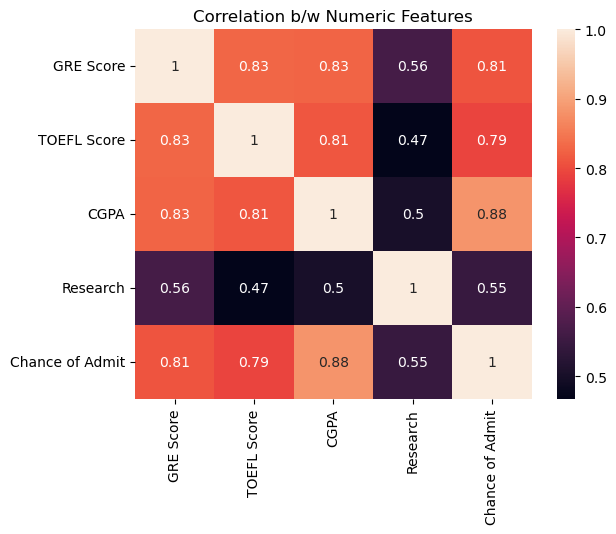

In [9]:
# Heatmap to analyse the correlation between numerical features and Chance of Admit
df_corr=df.corr(numeric_only=True)
sns.heatmap(df_corr,annot=True)
plt.title('Correlation b/w Numeric Features')
plt.show()

- To backup the inferences made from the pairplot , the correlation matrix shows that the exam scores(CGPA/GRE/TOEFL) have a strong positive correlation with chances of admit

C:\Users\junai\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

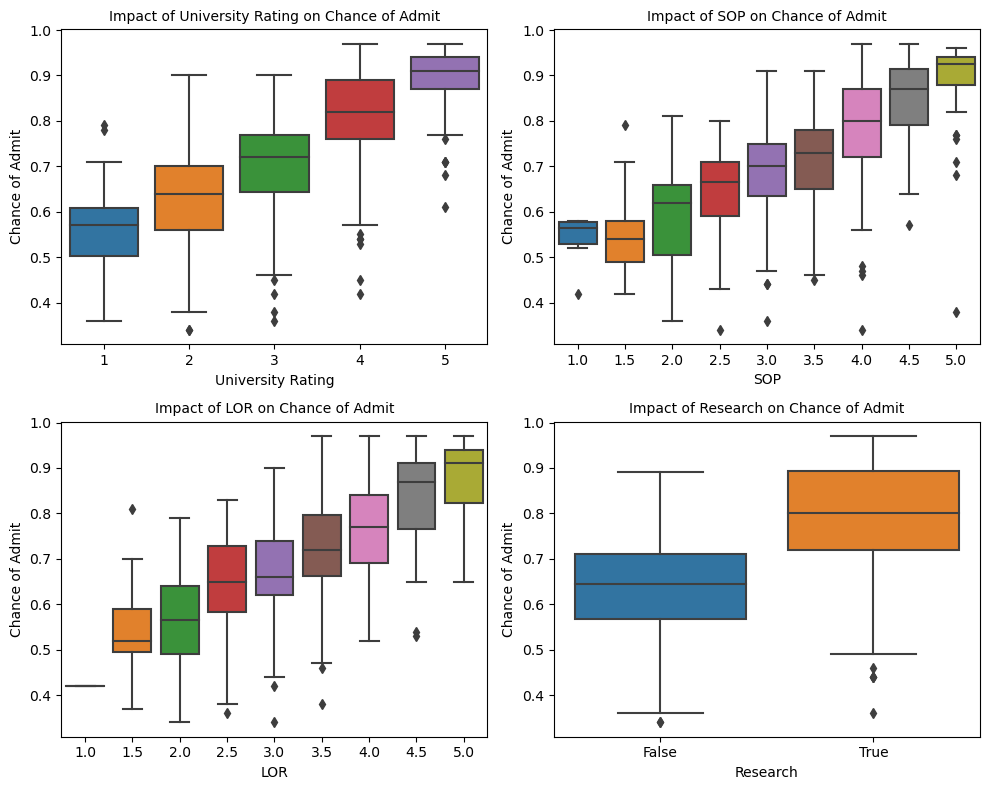

In [10]:
# Box plots to analyse the relationship between categorical variables and Chance of Admit

cat_cols=df.select_dtypes(include=['bool','category']).columns.tolist()
plt.figure(figsize=(10,8))
i=1
for col in cat_cols:
    ax=plt.subplot(2,2,i)
    sns.boxplot(data=df,x=col,y='Chance of Admit')
    plt.title(f"Impact of {col} on Chance of Admit",fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')
    i+=1

plt.tight_layout()
plt.show()

As is seen in the pairplot above as the university rating , SOP score, LOR Score and research increases, chances of admit also increase. 

C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

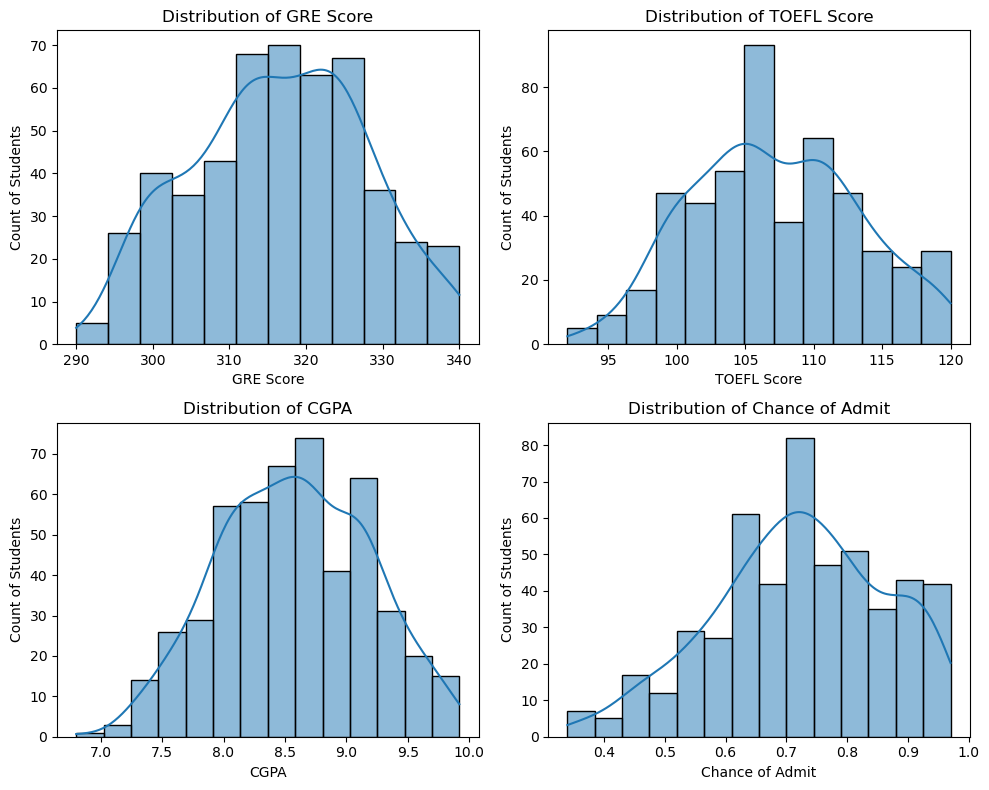

In [11]:
# Distribution of continuous variables

numeric_cols= df.select_dtypes(include=['int64','float64']).columns.tolist()

plt.figure(figsize=(10,8))
i=1

for col in numeric_cols:
    ax=plt.subplot(2,2,i)
    sns.histplot(data=df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    i+=1

plt.tight_layout()
plt.show()

- GRE scores are in the range of 290 and 340 with the max number of students scoring between 310-330
- TOEFL scores are between 90 and 120 with max students scoring around 105
- CGPA is between 7-10 , with max students scoring around 8.5


C:\Users\junai\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


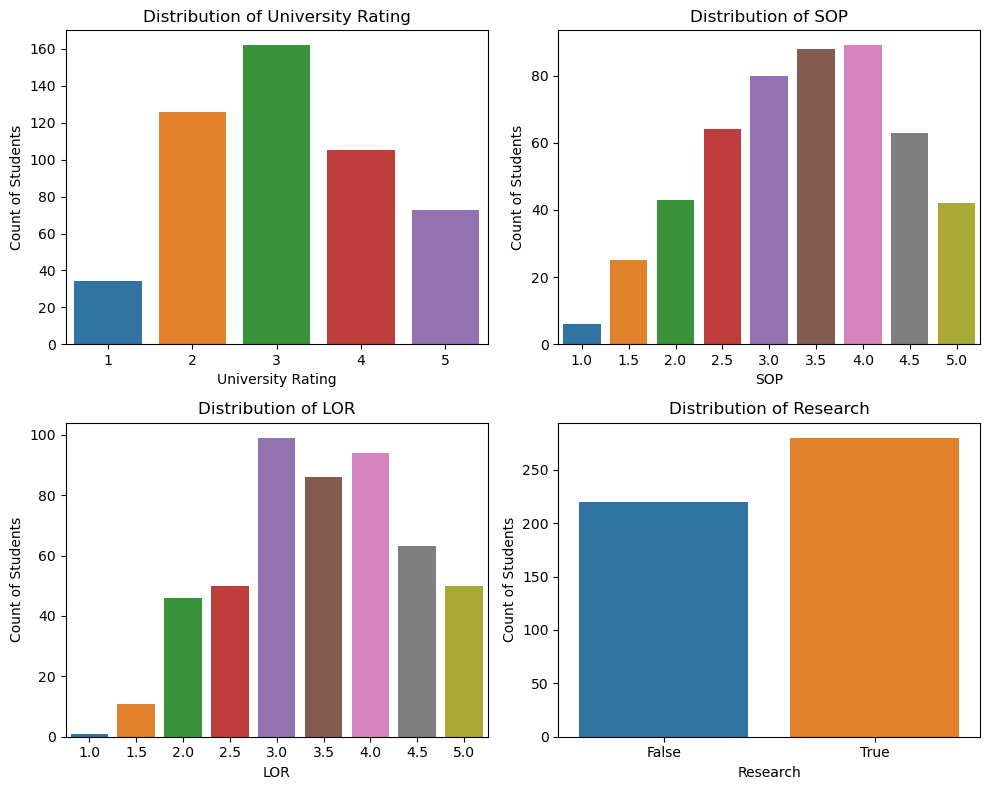

In [12]:
# Distribution of Categorical variables

plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
    ax=plt.subplot(2,2,i)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    i+=1
    
plt.tight_layout()
plt.show()

Most frequent value of categorical values are:
- University Rating: 3
- SOP: 3
- LOR: 3
- Research:True

## Data Preprocessing

Missing Values/ Outliers/ Duplicates Check

In [13]:
## Check for missing values

df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Dataset contains no missing values

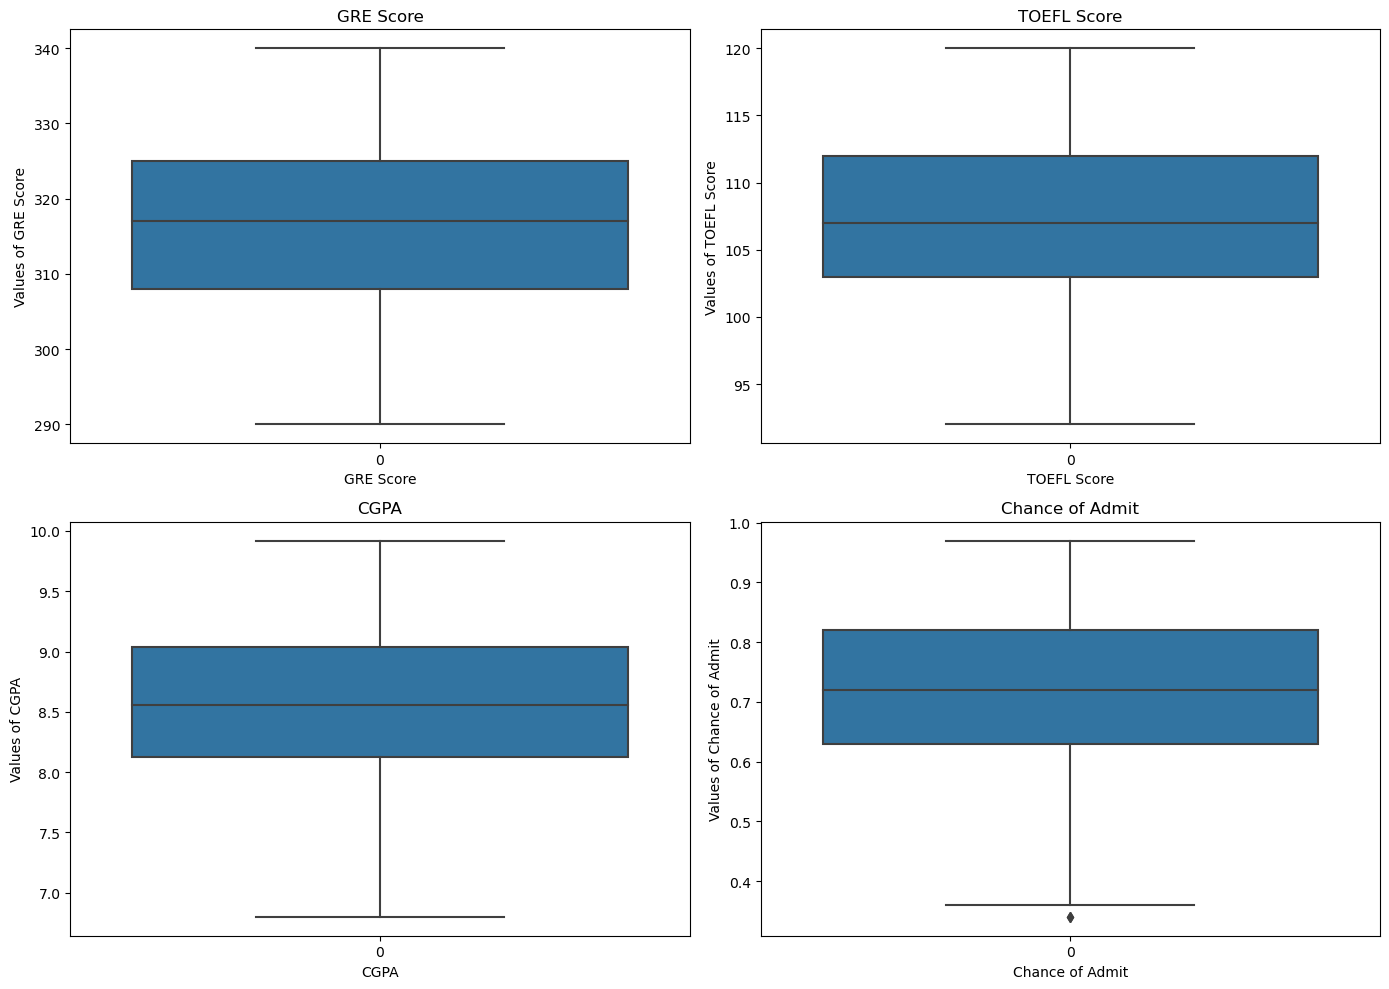

In [14]:
## Check for outliers

plt.figure(figsize=(14,10))
i=1

for col in numeric_cols:
    ax=plt.subplot(2,2,i)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(f'Values of {col}')
    i+=1

plt.tight_layout()
plt.show()

It can be seen that there are not many outliers present in the numeric columns

In [15]:
## Check for duplicates

df[df.duplicated()].shape

(0, 8)

There are no duplicated rows present

## Train Test Split

In [16]:
numeric_cols.remove('Chance of Admit')

In [17]:
x=df[numeric_cols + cat_cols]
y=df[['Chance of Admit']]

In [18]:
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,True
1,324,107,8.87,4,4.0,4.5,True
2,316,104,8.00,3,3.0,3.5,True
3,322,110,8.67,3,3.5,2.5,True
4,314,103,8.21,2,2.0,3.0,False


In [19]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [20]:
# Split the data into train and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(f'Shape of x_train:{x_train.shape}')
print(f'Shape of x_test:{x_test.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of y_test:{y_test.shape}')

Shape of x_train:(400, 7)
Shape of x_test:(100, 7)
Shape of y_train:(400, 1)
Shape of y_test:(100, 1)


## Label Encoding and Standardisation

In [21]:
## Initialize a dictionary to store the label encoders
label_encoders={}

# Loop through the categorical columns and initialize the label encoder

for col in cat_cols:
    label_encoders[col]=LabelEncoder()

In [22]:
## Fitting encoders to the respective columns

for col in cat_cols:
    label_encoders[col].fit(x[col])

In [23]:
## Transforming the categorical columns in train test data

for col in cat_cols:
    x_train[col]=label_encoders[col].transform(x_train[col])
    x_test[col]=label_encoders[col].transform(x_test[col])

In [24]:
x_cat_encoded=pd.concat([x_train,x_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,2,5,6,1
433,316,111,8.54,3,6,8,0
19,303,102,8.50,2,5,4,0
322,314,107,8.27,1,3,6,0
332,308,106,8.21,2,5,3,1
56,316,102,7.40,2,2,4,0
301,319,108,8.76,1,3,4,0
229,324,111,9.01,3,4,4,1
331,311,105,8.12,1,4,2,1
132,309,105,8.56,4,5,5,0


In [25]:
## Initializing object of class MinMaxScaler() for Standardisation

scaler_x=MinMaxScaler()

In [26]:
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [27]:
all_cols=x_train.columns

In [28]:
# Transforming numeric columns of x_train and x_test

x_train[all_cols]=scaler_x.transform(x_train[all_cols])
x_test[all_cols]=scaler_x.transform(x_test[all_cols])

In [29]:
x_test.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0
155,0.44,0.607143,0.605769,0.50,0.500,0.500,0.0
104,0.72,0.714286,0.721154,0.50,0.625,0.500,1.0


## Linear Regression

In [30]:
## Initialize the model

model_lr= LinearRegression()

In [31]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [32]:
# Predicting values for the training and test data

y_pred_train=model_lr.predict(x_train)
y_pred_test=model_lr.predict(x_test)

In [33]:
# Evalutaing the model using multiple loss functions

def model_evaluation(y_actual,y_forecast,model):
    n=len(y_actual)
    if len (model.coef_.shape)==1:
        p=len(model.coef_)
    else:
        p=len(model.coef_[0])
    MAE =  np.round(mean_absolute_error(y_true=y_actual,y_pred=y_forecast),2)
    RMSE=np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast,squared=False),2)
    r2=np.round(r2_score(y_true=y_actual,y_pred=y_forecast),2)
    adj_r2=np.round(1-((1-r2)*(n-1)/(n-p-1)),2)
    return print(f"MAE:{MAE}\nRMSE:{RMSE}\nr2:{r2}\nadj_r2:{adj_r2}")

In [34]:
#Metrics for training data
model_evaluation(y_train.values,y_pred_train,model_lr)

MAE:0.04
RMSE:0.06
r2:0.82
adj_r2:0.82


In [35]:
#Metrics for training data
model_evaluation(y_test.values,y_pred_test,model_lr)

MAE:0.04
RMSE:0.06
r2:0.82
adj_r2:0.81


Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

- Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
- Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
- R2 Score of 0.82 means that our model captures 82% variance in the data
- Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

In [36]:
# Model Coefficients

for feature,weight in zip(x_train.columns, model_lr.coef_[0]):
  print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.08
Weight of CGPA: 0.35
Weight of University Rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.07
Weight of Research: 0.02


In [37]:
# Bias Term of the model

model_lr.intercept_

array([0.34696506])

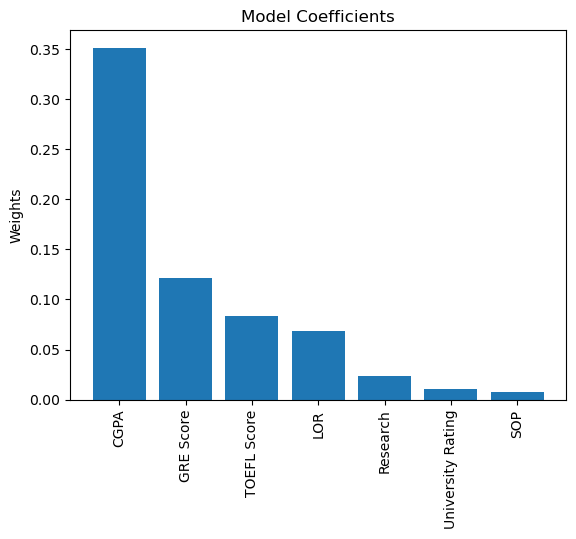

In [38]:
model_weights=list(zip(x_train.columns,model_lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse= True)

features =[i[0] for i in model_weights]
weights=[i[1] for i in model_weights]

plt.bar(x=features,height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show()

## Test assumptions of linear regression

## Multicollinearity check

VIF(Variance Inflation Factor) is a measure that quantifies the severity of multicollienarity in a regression. It assesses how much the variance of the estimated regression coeff is inflated due to collinearity.

The formula for VIF:

VIF(j) = 1/(1-R(j)^2)

where:
j represents the jth predictor variable
R(j) represents the coeff of determination obtained from regressing the jth predictor variable on all the other predictor variables

In [39]:
vif=pd.DataFrame()
vif['Variable']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,31.185925
1,TOEFL Score,26.753950
2,CGPA,41.732265
3,University Rating,10.837374
4,SOP,18.864173
5,LOR,14.657099
6,Research,3.366187


We see here that all the variables excpet the Research variable show a high level of collinearity. This was also observed in the heatmap which showed a strong postive correlation between GRE score, TOEFL and CGPA.

## Mean Of Residuals

The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.

In [40]:
residuals=y_test.values-y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals:',residuals.mean())

Mean of Residuals: -0.005453623717661331


Since the mean of residuals is cloe to 0, we can say that it is an unbiased model.

## Linearity of Variables

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.
If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.

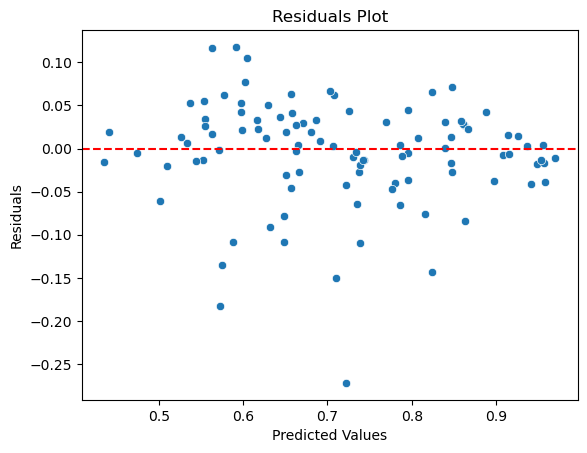

In [41]:
sns.scatterplot(x=y_pred_test.reshape((-1)),y=residuals.reshape((-1)))
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0,color='r',linestyle='--')
plt.show()

Since the residual plot does not show any clear pattern we can conclude that linearity of variables exists

## Homoscedasticity

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

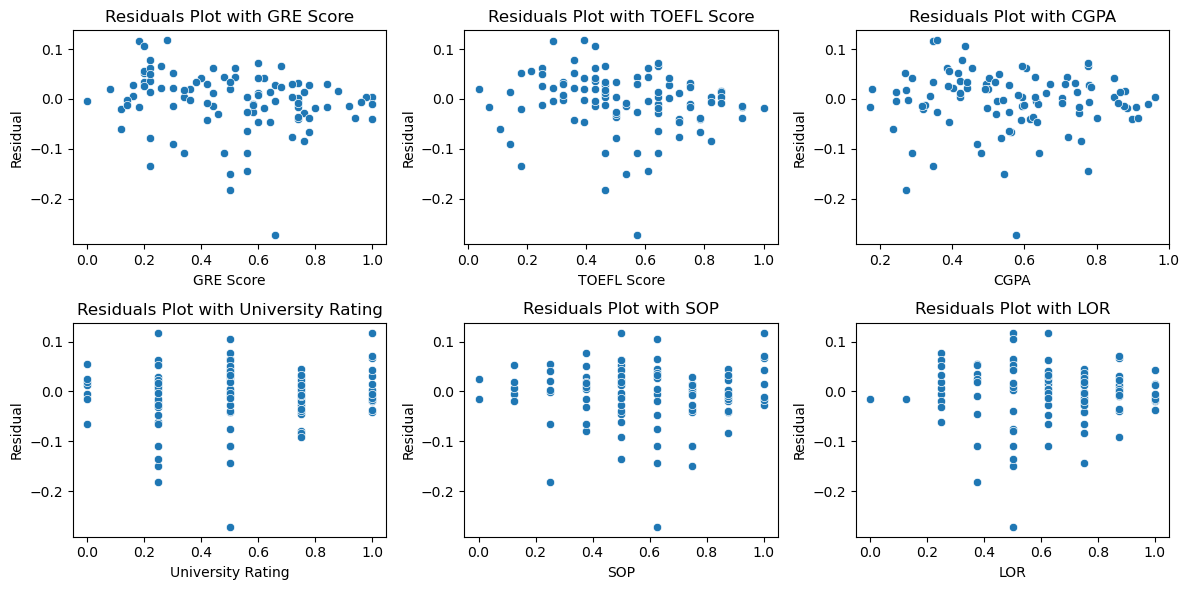

In [42]:
## Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
    ax=plt.subplot(2,3,i)
    sns.scatterplot(x=x_test[col].values.reshape((-1)),y=residuals.reshape((-1)))
    plt.title(f'Residuals Plot with {col}')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1
    
plt.tight_layout()
plt.show()

Since there is not a significant change in the spread of residuals with respect to change in  independent variables, we concule the homoscedasticity test.

## Normality of Residuals

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.

Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

C:\Users\junai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


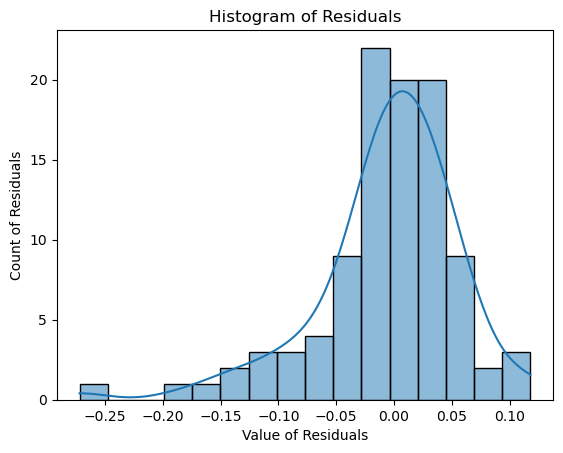

In [43]:
#Histogram of Residuals

sns.histplot(residuals.reshape((-1,)),kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show()

The histogram shows a slight negative skewness in the distribution of the residuals but close to normal distribution

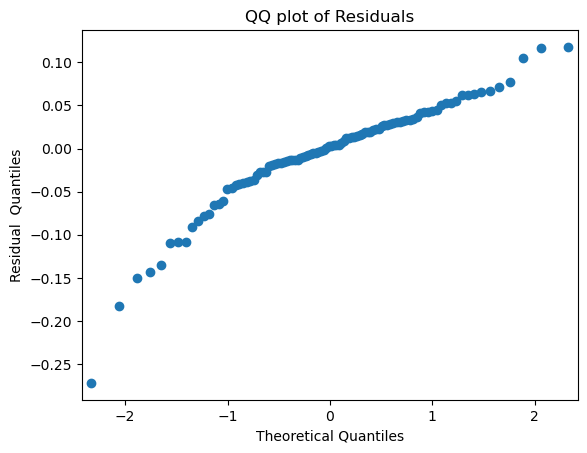

In [44]:
## Q-Q Plot of residuals

sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ plot of Residuals')
plt.ylabel('Residual  Quantiles')
plt.show()

The QQ plot shows that residuals are  slightly deviating from straight diagonal

## Lasso and Ridge Regression

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

Ridge Regression:
Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

Lasso Regression:
Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

The main differences between Ridge and Lasso regression are:

Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [50]:
# Initialization of Ridge and Lasso classes

model_ridge=Ridge()
model_lasso=Lasso()

## Fitting the models to the training data

model_ridge.fit(x_train,y_train)
model_lasso.fit(x_train,y_train)

Lasso()

In [46]:
# Predict the values for train and test data

y_train_ridge=model_ridge.predict(x_train)
y_test_ridge=model_ridge.predict(x_test)

y_train_lasso=model_lasso.predict(x_train)
y_test_lasso=model_lasso.predict(x_test)

In [49]:
## Evaluating Model Performance

print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values,y_train_ridge,model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values,y_test_ridge,model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values,y_train_ridge,model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values,y_test_ridge,model_lasso)

Ridge Regression Training Accuracy

MAE:0.04
RMSE:0.06
r2:0.82
adj_r2:0.82


Ridge Regression Test Accuracy

MAE:0.04
RMSE:0.06
r2:0.82
adj_r2:0.81


Lasso Regression Training Accuracy

MAE:0.04
RMSE:0.06
r2:0.82
adj_r2:0.82


Lasso Regression Test Accuracy

MAE:0.04
RMSE:0.06
r2:0.82
adj_r2:0.81


While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

## Identifying the best model

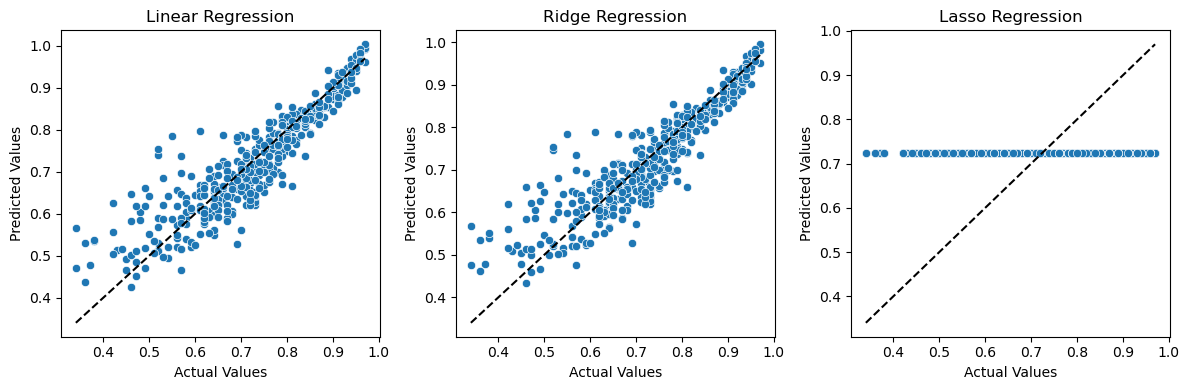

In [57]:
# Actual v/s Predicted values for training data

actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show();

We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

## Insights & Recommendations

- Insights:

The distribution of target variable (chances of admit) is left-skewed

Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves

The categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.

From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant.

Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.

Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

- Recommendations:

Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.

Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables